In [1]:
from scipy.stats import describe
from modelscripts import MS98ann_b_systemscript as systemscript
from modelscripts import MS98cart_systemscript as systemscript2
from modelscripts import MS98ann_initialscript as initialscript
from planetengine.utilities import quickShow
from planetengine.utilities import Grouper
import numpy as np
import glucifer
import matplotlib.pyplot as plt

In [2]:
system32 = systemscript.build(res = 32, Ra = 1e4, isoviscous = True)
system64 = systemscript.build(res = 64, Ra = 1e4, isoviscous = True)
system32sq = systemscript.build(res = 32, Ra = 1e4, ratio = 1., isoviscous = True)
system64sq = systemscript.build(res = 64, Ra = 1e4, ratio = 1., isoviscous = True)
system32cart = systemscript2.build(res = 32, Ra = 1e4, isoviscous = True)
system64cart = systemscript2.build(res = 64, Ra = 1e4, isoviscous = True)

In [3]:
systemList = [system32, system64, system32sq, system64sq, system32cart, system64cart]

In [4]:
def run(system):
    initialscript.build().apply(system)
    mesh = system.mesh
    velocityField = system.velocityField
    temperatureField = system.temperatureField
    velGrad = velocityField.fn_gradient
    divFn = velGrad[0] + velGrad[3]
    curlFn = velGrad[2] - velGrad[1]
    allNodes = mesh.specialSets['Empty']
    allNodes.invert()
    nonWalls = allNodes - mesh.specialSets['AllWalls_VertexSet']
    def show():
        quickShow(temperatureField, velocityField, mesh)
        quickShow((mesh, divFn), velocityField)
        print('\nStats for whole mesh:')
        print(describe(divFn.evaluate(mesh)))
        print('\nStats for non-wall nodes:')
        print(describe(divFn.evaluate(nonWalls)))
        print('\nStats for just the wall nodes:')
        print(describe(divFn.evaluate(mesh.specialSets['AllWalls_VertexSet'])))
    return Grouper(locals())

In [5]:
run(system32)

In [6]:
sys32 = run(system32)
sys64 = run(system64)
sys32sq = run(system32sq)
sys64sq = run(system64sq)
sys32cart = run(system32cart)
sys64cart = run(system64cart)


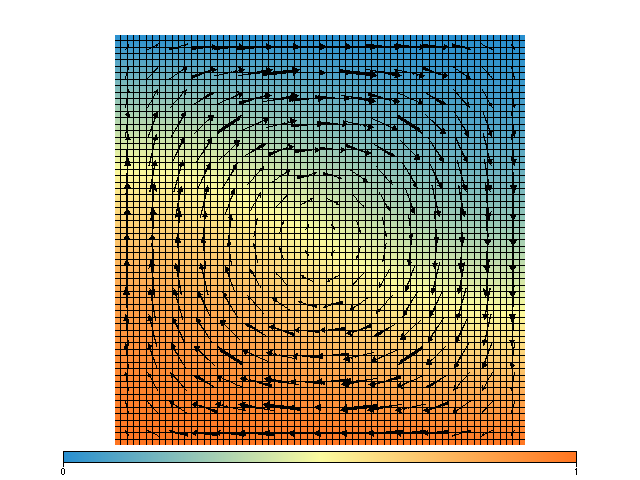


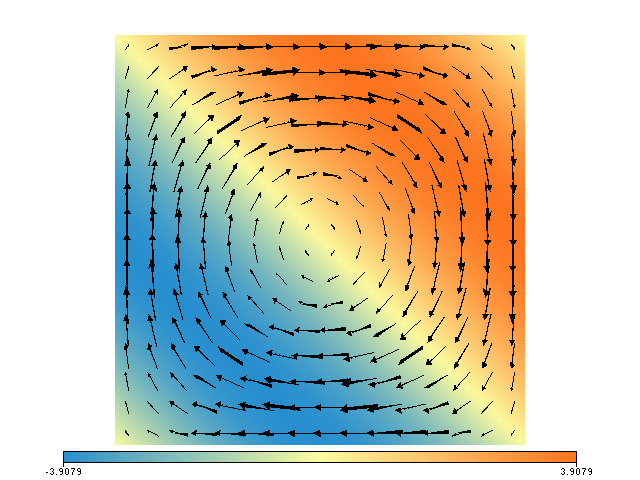


Stats for whole mesh:
DescribeResult(nobs=4225, minmax=(array([-3.90792743]), array([ 3.90793245])), mean=array([-0.00010818]), variance=array([ 7.62180169]), skewness=array([ -6.98654841e-06]), kurtosis=array([-1.49964444]))

Stats for non-wall nodes:
DescribeResult(nobs=3969, minmax=(array([-3.90792733]), array([ 3.90431554])), mean=array([-0.00011493]), variance=array([ 7.62180071]), skewness=array([ -7.34224854e-06]), kurtosis=array([-1.49962173]))

Stats for just the wall nodes:
DescribeResult(nobs=256, minmax=(array([-3.90792743]), array([ 3.90793245])), mean=array([ -3.63200150e-06]), variance=array([ 7.65170635]), skewness=array([ -1.50277418e-06]), kurtosis=array([-1.49999636]))


In [72]:
sys64sq.show()


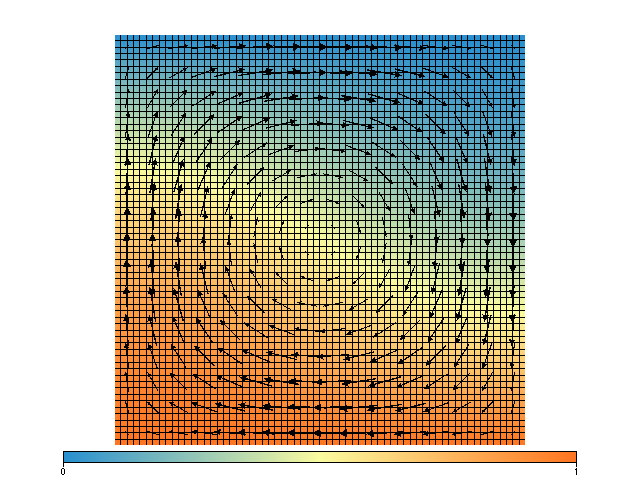


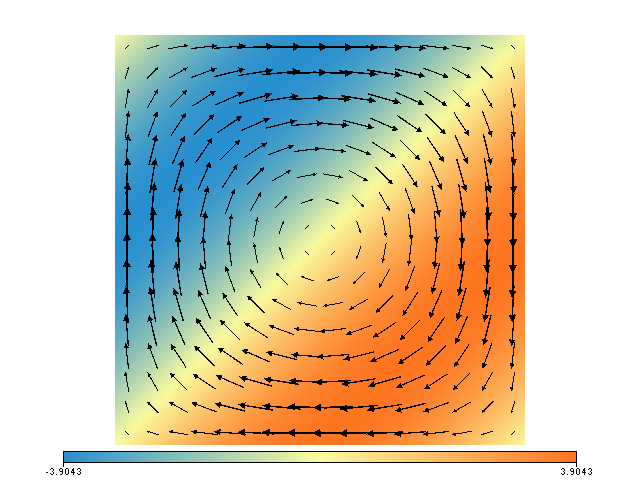


Stats for whole mesh:
DescribeResult(nobs=4225, minmax=(array([-3.90429871]), array([ 3.90429379])), mean=array([  9.41081668e-09]), variance=array([ 7.62173704]), skewness=array([ -1.66292933e-07]), kurtosis=array([-1.49964484]))

Stats for non-wall nodes:
DescribeResult(nobs=3969, minmax=(array([-3.90429871]), array([ 3.90429379])), mean=array([  7.89930189e-09]), variance=array([ 7.6217368]), skewness=array([ -1.69870514e-07]), kurtosis=array([-1.49962194]))

Stats for just the wall nodes:
DescribeResult(nobs=256, minmax=(array([-3.90429069]), array([ 3.90429094])), mean=array([  3.28452016e-08]), variance=array([ 7.65162997]), skewness=array([ -1.10853890e-07]), kurtosis=array([-1.4999998]))


In [73]:
sys64cart.show()

In [13]:
describe(sys32sq.velocityField.data)

DescribeResult(nobs=1089, minmax=(array([-50.59949373, -50.59964407]), array([ 50.59967475,  50.5995281 ])), mean=array([ -1.13036348e-04,  -8.23248076e-06]), variance=array([ 640.07947333,  640.07951441]), skewness=array([  8.94988849e-06,  -2.30537384e-07]), kurtosis=array([-0.70377378, -0.70377377]))

In [14]:
describe(sys32cart.velocityField.data)

DescribeResult(nobs=1089, minmax=(array([-50.59958405, -50.59958448]), array([ 50.59958403,  50.59958481])), mean=array([  8.61097591e-08,   8.39251882e-08]), variance=array([ 640.07948264,  640.07949181]), skewness=array([  2.78051586e-09,   3.22379339e-09]), kurtosis=array([-0.70377379, -0.70377379]))

In [15]:
sys32sq.velGrad.evaluate(sys32sq.mesh)[0]

array([  1.58708574e+02,  -1.58666820e-03,  -1.51204334e-03,
        -1.58708539e+02])

In [16]:
sys32cart.velGrad.evaluate(sys32cart.mesh)[32]

array([  1.58708048e+02,   1.24956025e-07,   8.37666306e-08,
        -1.58708049e+02])

In [17]:
sys32sq.velocityField.evaluate(sys32sq.mesh)[0]

array([ -8.71575644e-09,  -5.20066492e-05])

In [18]:
sys32cart.velocityField.evaluate(sys32cart.mesh)[32]

array([  8.29631261e-09,   2.74085587e-09])

In [19]:
sys32sq.velGrad.evaluate(sys32sq.mesh)[544]

array([  1.56321467e-05,   1.58708065e+02,  -1.58708045e+02,
        -1.41274668e-06])

In [20]:
sys32cart.velGrad.evaluate(sys32cart.mesh)[544]

array([ -2.75095452e-06,   1.58708046e+02,  -1.58708052e+02,
        -7.60339999e-07])

In [21]:
sys32sq.velocityField.evaluate(sys32sq.mesh)[544]

array([ -1.12099935e-04,  -1.04647213e-06])

In [22]:
sys32cart.velocityField.evaluate(sys32cart.mesh)[544]

array([  2.67493816e-07,   1.22475249e-07])

In [23]:
(np.square(sys32sq.velocityField.data - np.flip(sys32cart.velocityField.data))).mean()

1278.9834607932828

In [24]:
sys32sq.velocityField.data[512]

array([ 4.93563173, -4.93574616])

In [25]:
sys32cart.velocityField.data[512]

array([-4.93574432, -4.93574459])

In [26]:
sys32sq.velocityField.data[16]

array([ -2.53000181e-04,  -5.05996441e+01])

In [27]:
sys32cart.velocityField.data[16]

array([ -5.05995841e+01,  -1.63236513e-08])

In [28]:
sys32sq.velocityField.evaluate(sys32sq.nonWalls)

array([[ -4.93581273,  -4.93573671],
       [ -4.86442115,  -9.82396104],
       [ -4.74618291, -14.61757351],
       ..., 
       [  4.74595058,  14.61753899],
       [  4.86423643,   9.82394998],
       [  4.93567667,   4.93575278]])

In [29]:
np.flip(sys32cart.velocityField.evaluate(sys32cart.nonWalls), axis = (0, 1))

array([[ -4.93574482,   4.93574444],
       [ -4.86432887,   9.82395497],
       [ -4.74606682,  14.61755576],
       ..., 
       [  4.74606675, -14.61755581],
       [  4.86432865,  -9.82395513],
       [  4.93574456,  -4.93574456]])

In [30]:
sysAnnSmall = systemscript.build(res = 4, Ra = 1e4, isoviscous = True, ratio = 1.)


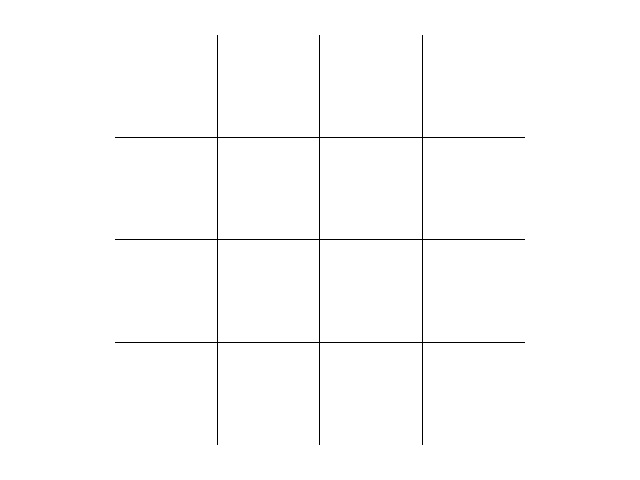

In [31]:
quickShow(sysAnnSmall.mesh)


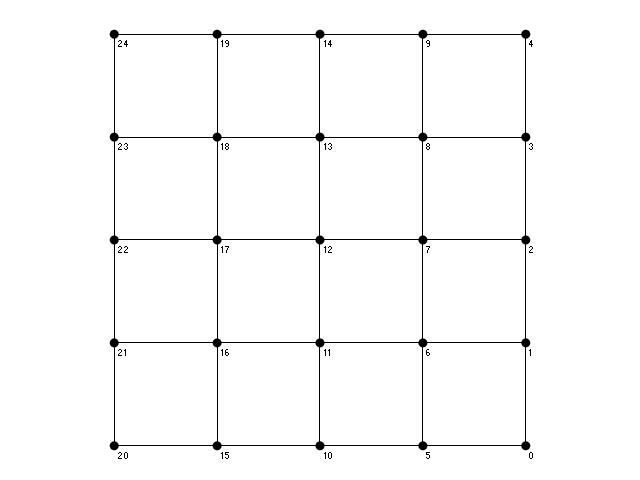

In [32]:
figMesh = glucifer.Figure()
figMesh.append(glucifer.objects.Mesh(sysAnnSmall.mesh, nodeNumbers=True, pointsize=10) )
figMesh.show()

In [33]:
sysCartSmall = systemscript2.build(res = 4, Ra = 1e4, isoviscous = True)


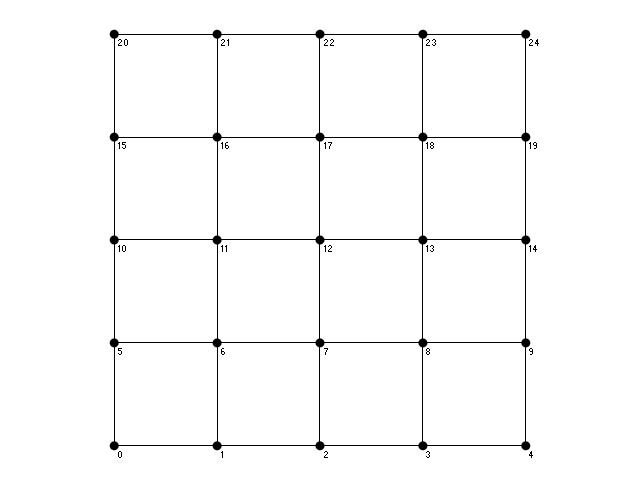

In [34]:
figMesh = glucifer.Figure()
figMesh.append(glucifer.objects.Mesh(sysCartSmall.mesh, nodeNumbers=True, pointsize=10) )
figMesh.show()

In [35]:
arr0 = np.array([[1, 0], [1, 0.5], [1, 1], [0.5, 0], [0.5, 0.5], [0.5, 1], [0, 0], [0, 0.5], [0, 1]])

In [36]:
arr0

array([[ 1. ,  0. ],
       [ 1. ,  0.5],
       [ 1. ,  1. ],
       [ 0.5,  0. ],
       [ 0.5,  0.5],
       [ 0.5,  1. ],
       [ 0. ,  0. ],
       [ 0. ,  0.5],
       [ 0. ,  1. ]])

In [37]:
arr1 = np.vstack(np.rot90(np.reshape(arr0, (3, 3, 2)), axes = (1, 0)))

In [38]:
arr1

array([[ 0. ,  0. ],
       [ 0.5,  0. ],
       [ 1. ,  0. ],
       [ 0. ,  0.5],
       [ 0.5,  0.5],
       [ 1. ,  0.5],
       [ 0. ,  1. ],
       [ 0.5,  1. ],
       [ 1. ,  1. ]])

In [39]:
arr2 = np.array([[0, 'a'], [1, 'b'], [2, 'c'], [3, 'd']])

In [40]:
arr3 = np.vstack(np.rot90(np.reshape(arr2, (2, 2, 2)), axes = (1, 0)))

In [41]:
arr3

array([['2', 'c'],
       ['0', 'a'],
       ['3', 'd'],
       ['1', 'b']],
      dtype='<U21')

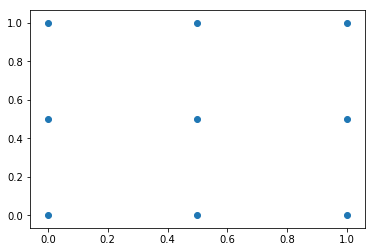

In [42]:
plt.scatter(arr0[:,0], arr0[:,1])

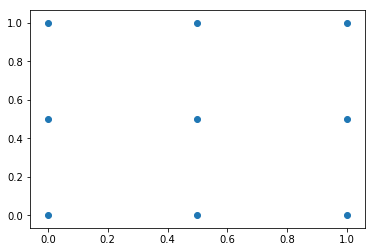

In [43]:
plt.scatter(arr1[:,0], arr1[:,1])

In [44]:
sys32sqVelArr = sys32sq.velocityField.data[:]
sys32cartVelArr = sys32cart.velocityField.data[:]

In [45]:
sys32sqVelArrReshaped = np.vstack(np.rot90(np.reshape(sys32sqVelArr, (33, 33, 2)), axes = (1, 0)))

In [46]:
sys32sqVelArrReshaped.shape

(1089, 2)

In [47]:
sys32sqVelArrReshaped.shape == sys32cartVelArr.shape

True

In [48]:
sys32cartVelArr[544]

array([  2.67493816e-07,   1.22475249e-07])

In [49]:
sys32sqVelArrReshaped[544]

array([ -1.12099935e-04,  -1.04647213e-06])

In [50]:
sys32sq.velocityField.evaluate(sys32sq.mesh)[544]

array([ -1.12099935e-04,  -1.04647213e-06])

In [51]:
sys32cart.velocityField.evaluate(sys32cart.mesh)[544]

array([  2.67493816e-07,   1.22475249e-07])

In [52]:
describe(sys32sq.velocityField.data)

DescribeResult(nobs=1089, minmax=(array([-50.59949373, -50.59964407]), array([ 50.59967475,  50.5995281 ])), mean=array([ -1.13036348e-04,  -8.23248076e-06]), variance=array([ 640.07947333,  640.07951441]), skewness=array([  8.94988849e-06,  -2.30537384e-07]), kurtosis=array([-0.70377378, -0.70377377]))

In [53]:
describe(sys32cart.velocityField.data)

DescribeResult(nobs=1089, minmax=(array([-50.59958405, -50.59958448]), array([ 50.59958403,  50.59958481])), mean=array([  8.61097591e-08,   8.39251882e-08]), variance=array([ 640.07948264,  640.07949181]), skewness=array([  2.78051586e-09,   3.22379339e-09]), kurtosis=array([-0.70377379, -0.70377379]))

In [54]:
sys32sqMeshArr = sys32sq.mesh.data
sys32cartMeshArr = sys32cart.mesh.data
sys32sqMeshArrReshaped = np.vstack(np.rot90(np.reshape(sys32sqMeshArr, (33, 33, 2)), axes = (1, 0)))

In [55]:
sys32cartMeshArr[0]

array([ 0.,  0.])

In [56]:
sys32sqMeshArrReshaped[0]

array([ -4.99997500e-01,   9.99990000e+04])

In [57]:
sys32cart.velocityField.evaluate(sys32cartMeshArr)[16]

array([ -5.05995841e+01,  -1.63236513e-08])

In [58]:
sys32sq.velocityField.evaluate(sys32sqMeshArrReshaped)[16]

array([ -5.05994937e+01,  -5.21319361e-05])

In [59]:
testArr = np.array([sys32sq.mesh.data[:,0].min(), sys32sq.mesh.data[:,1].min()])

In [60]:
sys32sqMeshArrReshaped[0] / testArr

array([ 0.99999,  1.     ])

In [61]:
sys4 = run(sysAnnSmall)
sys4cart = run(sysCartSmall)

In [62]:
sys4cart.velocityField.evaluate(sys4cart.mesh).astype(int)

array([[  3.19094746e-06,  -7.43891527e-07],
       [ -3.31427616e+01,  -1.96586235e-07],
       [ -4.68709853e+01,   3.50719057e-07],
       [ -3.31427795e+01,  -2.01877443e-07],
       [  3.53105499e-06,  -7.54473944e-07],
       [  6.75962069e-07,   3.31427883e+01],
       [ -2.34354840e+01,   2.34354764e+01],
       [ -3.31427751e+01,  -5.93408187e-06],
       [ -2.34354843e+01,  -2.34354672e+01],
       [  1.65206628e-06,  -3.31427581e+01],
       [ -1.83902333e-06,   4.68709568e+01],
       [ -4.81607543e-06,   3.31427802e+01],
       [  1.34313644e-05,   1.24173147e-05],
       [  4.37932591e-06,  -3.31427583e+01],
       [ -2.26922425e-07,  -4.68709378e+01],
       [ -8.89294140e-07,   3.31427942e+01],
       [  2.34354846e+01,   2.34355026e+01],
       [  3.31427696e+01,   7.32134112e-06],
       [  2.34354875e+01,  -2.34354964e+01],
       [ -1.84153204e-06,  -3.31427965e+01],
       [  6.04350445e-08,  -2.59290316e-06],
       [  3.31427814e+01,  -9.18328071e-07],
       [  

In [87]:
sys4cart.velocityField.data.astype(int)

array([[  0,   0],
       [-33,   0],
       [-46,   0],
       [-33,   0],
       [  0,   0],
       [  0,  33],
       [-23,  23],
       [-33,   0],
       [-23, -23],
       [  0, -33],
       [  0,  46],
       [  0,  33],
       [  0,   0],
       [  0, -33],
       [  0, -46],
       [  0,  33],
       [ 23,  23],
       [ 33,   0],
       [ 23, -23],
       [  0, -33],
       [  0,   0],
       [ 33,   0],
       [ 46,   0],
       [ 33,   0],
       [  0,   0]])

In [85]:
np.vstack(np.rot90(np.reshape(sys4.velocityField.data, (5, 5, 2)), axes = (1, 0))).astype(int)

array([[  0,   0],
       [-33,   0],
       [-46,   0],
       [-33,   0],
       [  0,   0],
       [  0,  33],
       [-23,  23],
       [-33,   0],
       [-23, -23],
       [  0, -33],
       [  0,  46],
       [  0,  33],
       [  0,   0],
       [  0, -33],
       [  0, -46],
       [  0,  33],
       [ 23,  23],
       [ 33,   0],
       [ 23, -23],
       [  0, -33],
       [  0,   0],
       [ 33,   0],
       [ 46,   0],
       [ 33,   0],
       [  0,   0]])

In [90]:
sys4cart.velGrad.evaluate(sys4cart.mesh).astype(int)

array([[-132,    0,    0,  132],
       [ -54,   38,    0,   93],
       [  54,   54,    0,    0],
       [ 132,   38,    0,  -93],
       [ 132,    0,    0, -132],
       [ -93,    0,  -38,   54],
       [ -38,   93,  -93,   38],
       [  38,  132,  -93,    0],
       [  93,   93,  -38,  -38],
       [  93,    0,  -38,  -54],
       [   0,    0,  -54,  -54],
       [   0,   93, -132,  -38],
       [   0,  132, -132,    0],
       [   0,   93,  -54,   38],
       [   0,    0,  -54,   54],
       [  93,    0,  -38, -132],
       [  38,   38,  -93,  -93],
       [ -38,   54,  -93,    0],
       [ -93,   38,  -38,   93],
       [ -93,    0,  -38,  132],
       [ 132,    0,    0, -132],
       [  54,   38,    0,  -93],
       [ -54,   54,    0,    0],
       [-132,   38,    0,   93],
       [-132,    0,    0,  132]])

In [92]:
np.vstack(np.rot90(np.reshape(sys4.velGrad.evaluate(sys4.mesh), (5, 5, 4)), axes = (1, 0))).astype(int)

array([[-132,    0,    0,  132],
       [-132,   38,    0,   93],
       [ -54,   54,    0,    0],
       [  54,   38,    0,  -93],
       [ 132,    0,    0, -132],
       [ -93,    0,  -38,   54],
       [ -93,   93,  -38,   38],
       [ -38,  132,  -93,    0],
       [  38,   93,  -93,  -38],
       [  93,    0,  -38,  -54],
       [   0,    0,  -54,  -54],
       [   0,   93,  -54,  -38],
       [   0,  132, -132,    0],
       [   0,   93, -132,   38],
       [   0,    0,  -54,   54],
       [  93,    0,  -38, -132],
       [  93,   38,  -38,  -93],
       [  38,   54,  -93,    0],
       [ -38,   38,  -93,   93],
       [ -93,    0,  -38,  132],
       [ 132,    0,    0, -132],
       [ 132,   38,    0,  -93],
       [  54,   54,    0,    0],
       [ -54,   38,    0,   93],
       [-132,    0,    0,  132]])

In [95]:
sum(sys4cart.velGrad.evaluate(sys4cart.mesh).astype(int))

array([    0,  1026, -1026,     0])

In [98]:
sum(sys4.velGrad.evaluate(sys4.mesh).astype(int))

array([    0,  1026, -1026,     0])

In [107]:
sum(sys64cart.velGrad.evaluate(sys64cart.mesh).astype(int))

array([      0,  262133, -262133,       0])

In [108]:
sum(sys64sq.velGrad.evaluate(sys64sq.mesh).astype(int))

array([     -1,  262137, -262137,      -1])

In [120]:
import math
math.sqrt(4225)

65.0

In [118]:
sys64cart.velocityField.data.shape

(4225, 2)

In [135]:
sqArr = np.vstack(
    np.rot90(
        np.reshape(
            sys64sq.velocityField.data,
            (65, 65, 2)
            ), 
        axes = (1, 0)
        )
    ).astype(int)

cartArr = sys64cart.velocityField.data.astype(int)

(sqArr - cartArr == 0.).all()

True

In [136]:
sqGradArr = np.vstack(
    np.rot90(
        np.reshape(
            sys64sq.velocityField.fn_gradient.evaluate(sys64sq.mesh),
            (65, 65, 4)
            ), 
        axes = (1, 0)
        )
    ).astype(int)

cartGradArr = sys64cart.velocityField.fn_gradient.evaluate(sys64cart.mesh).astype(int)

(sqGradArr - cartGradArr == 0.).all()

False

In [158]:
sqArrMesh = np.vstack(
    np.rot90(
        np.reshape(
            sys64sq.mesh.data,
            (65, 65, 2)
            ), 
        axes = (1, 0)
        )
    )

cartArrMesh = sys64cart.mesh.data

In [169]:
sys64sq.velocityField.evaluate(list(sqArrMesh[2112]))

array([[ -1.16597633e-04,  -2.20548104e-07]])

In [170]:
sys64cart.velocityField.evaluate(list(cartArrMesh[2112]))

array([[  1.19408105e-07,  -9.87806549e-08]])

In [139]:
cartArr[300]

array([ 63,  32, -28, -59])

In [140]:
sqArr[300]

array([ 56,  32, -28, -59])


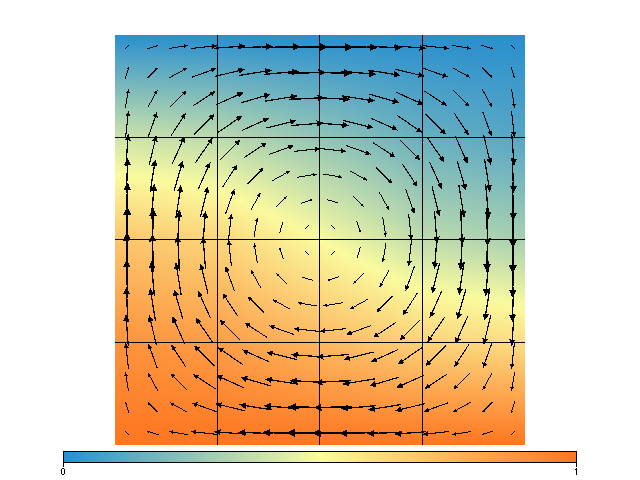


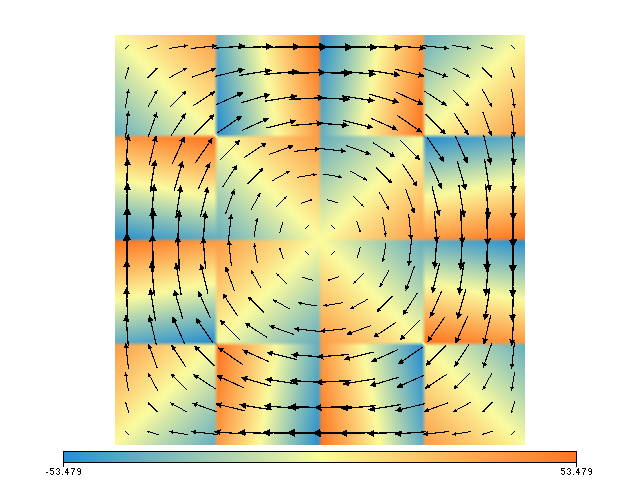


Stats for whole mesh:
DescribeResult(nobs=25, minmax=(array([-54.91287394]), array([ 54.91279788])), mean=array([ -1.70651141e-06]), variance=array([ 1507.7045938]), skewness=array([ -1.16869211e-06]), kurtosis=array([-1.43750064]))

Stats for non-wall nodes:
DescribeResult(nobs=9, minmax=(array([-54.91287394]), array([ 54.91277924])), mean=array([  8.85932182e-07]), variance=array([ 1507.70469958]), skewness=array([ -1.26038323e-06]), kurtosis=array([-1.3124966]))

Stats for just the wall nodes:
DescribeResult(nobs=16, minmax=(array([-54.91268728]), array([ 54.91279788])), mean=array([ -3.16476092e-06]), variance=array([ 1608.21817697]), skewness=array([ -1.11095075e-06]), kurtosis=array([-1.50000244]))


In [93]:
sys4cart.show()


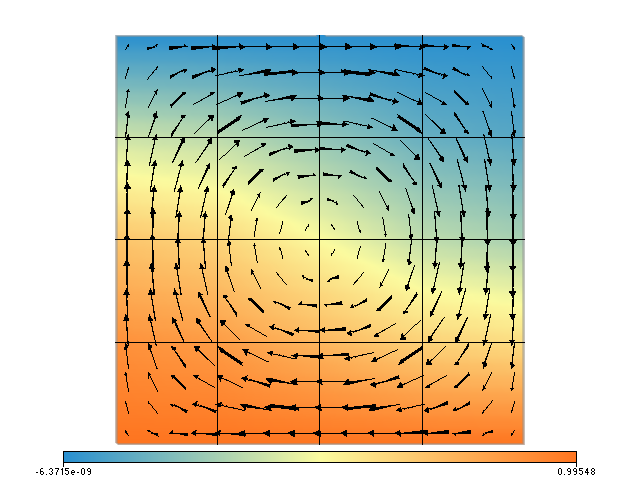


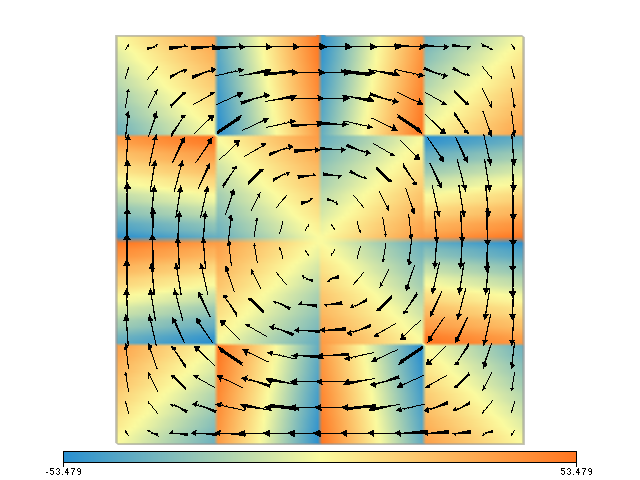


Stats for whole mesh:
DescribeResult(nobs=25, minmax=(array([-54.91303647]), array([ 54.91278773])), mean=array([ -5.99583962e-05]), variance=array([ 1507.70510983]), skewness=array([ -4.75898365e-06]), kurtosis=array([-1.43750033]))

Stats for non-wall nodes:
DescribeResult(nobs=9, minmax=(array([-54.91303647]), array([ 54.91252528])), mean=array([  1.93566074e-05]), variance=array([ 1507.70629049]), skewness=array([ -1.00315765e-05]), kurtosis=array([-1.31249966]))

Stats for just the wall nodes:
DescribeResult(nobs=16, minmax=(array([-54.91291943]), array([ 54.91278773])), mean=array([-0.00010457]), variance=array([ 1608.21815413]), skewness=array([ -1.88231808e-06]), kurtosis=array([-1.50000062]))


In [94]:
sys4.show()


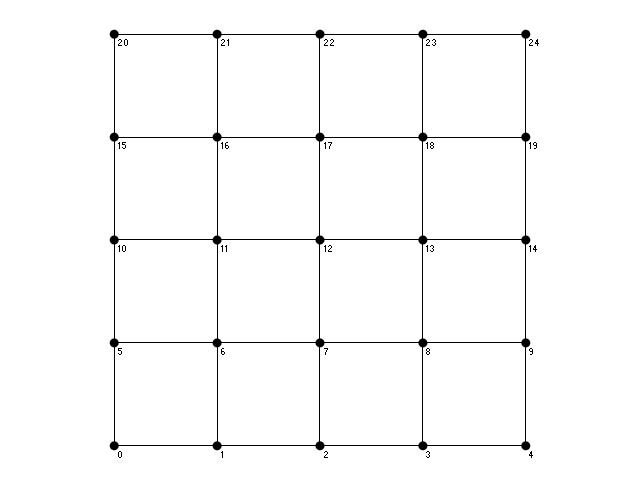

In [99]:
figMesh = glucifer.Figure()
figMesh.append(glucifer.objects.Mesh(sys4cart.mesh, nodeNumbers=True, pointsize=10) )
figMesh.show()


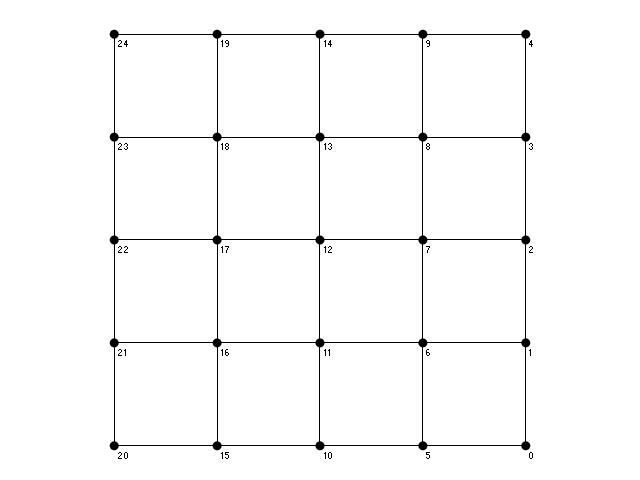

In [100]:
figMesh = glucifer.Figure()
figMesh.append(glucifer.objects.Mesh(sys4.mesh, nodeNumbers=True, pointsize=10) )
figMesh.show()

In [105]:
sys64cart.velGrad.evaluate(sys64cart.mesh).astype(int)[0]

array([-159,    0,    0,  159])

In [106]:
sys64sq.velGrad.evaluate(sys64sq.mesh).astype(int)[0]

array([ 159,    0,    0, -159])